# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Assuming you already have the HTML content in the 'html' variable
html = browser.html

In [5]:
# Extract all rows of data
# Create a BeautifulSoup object from the HTML content
soup = BeautifulSoup(html, 'html.parser')       

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
# Find the table element in the HTML
table = soup.find('table')

# Find all rows in the table
rows = table.find_all('tr')

# Loop through each row and extract data
for row in rows:
    # Extract data from each cell in the row
    cells = row.find_all('td')
    row_data = [cell.text.strip() for cell in cells]
    if row_data:
        data.append(row_data)  

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [8]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis
# Convert data types
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype('int64')
df['ls'] = df['ls'].astype('int64')
df['month'] = df['month'].astype('int64')
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)


In [11]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:

# 1. How many months are there on Mars?

# Count the occurrences of each month and sort by index

month_counts = df['month'].value_counts().sort_index()

# Remove the name of the index
month_counts.index.name = None

# Print the result
month_counts.name = 'month'
print(month_counts)


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64


In [13]:
# 2. How many Martian days' worth of data are there?
martian_days_count = df['sol'].nunique()
print(martian_days_count)


1867


In [14]:
# 3. What is the average low temperature by month?
average_low_temperature_by_month = df.groupby('month')['min_temp'].mean()
print(average_low_temperature_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


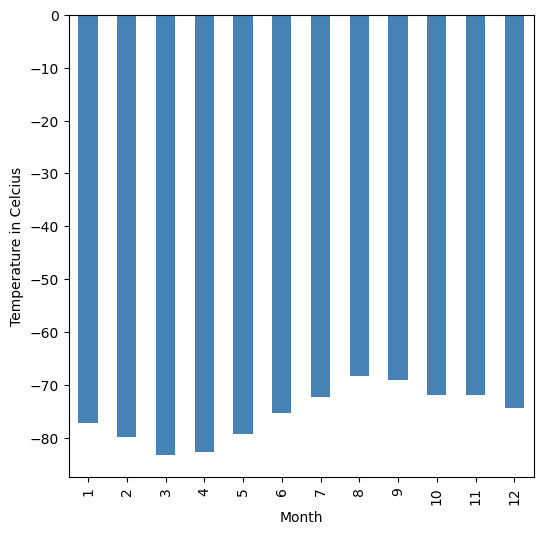

In [20]:

# Plot the average temperature by month
plt.figure(figsize=(6, 6))
average_low_temperature_by_month.plot(kind='bar', color='SteelBlue')
plt.xlabel('Month')
plt.ylabel('Temperature in Celcius')
plt.xticks(rotation=90)
plt.show()


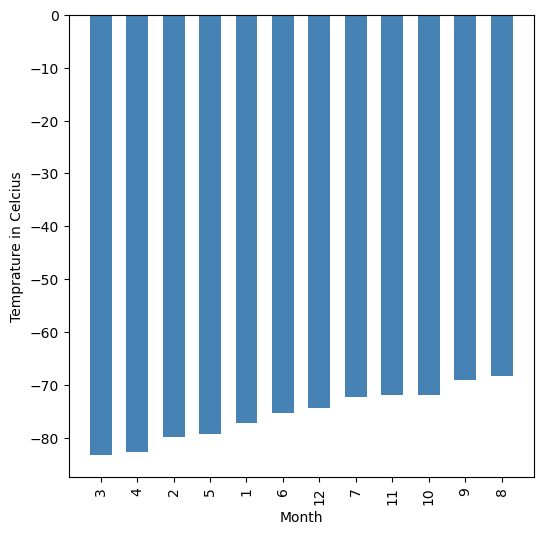

In [22]:
# Identify the coldest and hottest months in Curiosity's location
# Calculate the average low temperature for each month
month_avg = df.groupby('month')['min_temp'].mean()

# Find the coldest month
coldest_month = month_avg.idxmin()

# Sort the months based on their average low temperature
sorted_months = month_avg.sort_values().index

# Get the corresponding average temperatures
sorted_temperatures = [month_avg[month] for month in sorted_months]

# Plot the temperatures
plt.figure(figsize=(6, 6))
plt.bar(range(1, 13), sorted_temperatures, color='SteelBlue', width=0.6)
plt.xlabel('Month')
plt.ylabel('Temprature in Celcius')
plt.xticks(range(1, 13), sorted_months, rotation=90)
plt.show()

In [23]:
# 4. Average pressure by Martian month
# Calculate the average pressure for each month
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Display the result
print(average_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


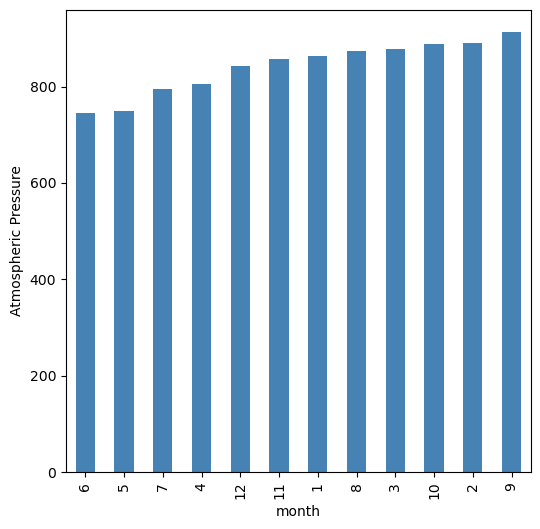

In [24]:
# Plot the average pressure by month
# Sort the data by pressure in ascending order
average_pressure_by_month_sorted = average_pressure_by_month.sort_values()

# Plot the average pressure by month with sorted data
plt.figure(figsize=(6, 6))
average_pressure_by_month_sorted.plot(kind='bar', color='SteelBlue')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation=90)
plt.show()

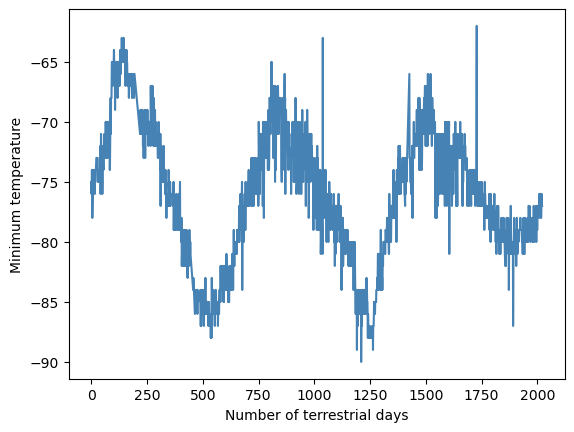

In [37]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Sort the DataFrame by terrestrial date
sorted_df = df.sort_values(by='terrestrial_date')

# Extract the sorted terrestrial days and minimum temperatures
sorted_terrestrial_days = sorted_df['terrestrial_date']
sorted_min_temperatures = sorted_df['min_temp']

# Convert terrestrial days to numeric days since the first observation
terrestrial_days_numeric = (sorted_terrestrial_days - sorted_terrestrial_days.min()).dt.days

# Plotting
plt.plot(terrestrial_days_numeric, sorted_min_temperatures, color='SteelBlue', linestyle='-')

# Set x-axis ticks in increments of 250 days
tick_values = range(0, max(terrestrial_days_numeric) + 1, 250)

# Set x-axis ticks and labels
plt.xticks(tick_values, rotation=0)

# Setting the y-label
plt.ylabel("Minimum temperature")

# Setting the x-label
plt.xlabel("Number of terrestrial days")

# Show the plot
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [38]:
# Write the data to a CSV
# Write the DataFrame to a CSV file
df.to_csv('weather_data_mars.csv', index=False)


In [39]:
browser.quit()